In [1]:
from openai import OpenAI
from dotenv import load_dotenv
from langchain_community.vectorstores import FAISS
from langchain_community.document_loaders import PyPDFLoader
from langchain_openai import OpenAIEmbeddings
import numpy as np

from Utils.embedding import plot_results

load_dotenv()

client = OpenAI()
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", chunk_size=1)
test_text_embeddings = [
    "Für was steht UNA?",
    "Für was steht UNH?",
    "Für was steht DTM?",
    "Für was steht RFF?",
    "Für was steht NAD?",
    "Für was steht LIN?",
    "Für was steht BGM?",
    "Was ist die Bezeichnung für Trennzeichen?",
    "Was ist die Bezeichnung für Gesetzlich vorgeschriebener Text?",
    "Was ist die Bezeichnung für Nachrichtendatum?",
]


results = []
loader = PyPDFLoader(
    "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",
    extract_images=False,
)
pages = loader.load_and_split()
faiss_index = FAISS.from_documents(pages, embeddings)

<>:30: SyntaxWarning: invalid escape sequence '\M'
<>:30: SyntaxWarning: invalid escape sequence '\M'
C:\Users\sebas\AppData\Local\Temp\ipykernel_22408\210513686.py:30: SyntaxWarning: invalid escape sequence '\M'
  "pdfs\MIG_VDA4938T2_eingehend_v.2.6_DE.pdf",


Erzeuge aus der liste "input_texts" embeddings.

In [2]:
faiss_index.similarity_search_with_score(test_text_embeddings[0], 1)[0][0].page_content

array("Segmente  \n \nBez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  \nSt = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  \n  Seite:12 /96  \n \n Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  \n  \n 0000 1   UNA   O 1 0  Trennzeichen-Vorgabe  \n  \n Standard  Implementierung  \nBez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  \nUNA       UNA  \nUNA1  Gruppendatenelement-  \nTrennzeichen  M an1   M an1 : Doppelpunkt  \nUNA2  Segment-Bezeichner- und  \nDatenelement -Trennzeichen  M an1   M an1 + Pluszeichen  \nUNA3  Dezimalzeichen  M an1   M an1  . Punkt  \nUNA4  Freigabezeichen  M an1   M an1  ? Fragezeichen  \nUNA5  Reserviert für spätere  \nVerwendung  M an1   M an1  Leerzeichen  \nUNA6  Segment -Endezeichen  M an1   M an1  ' Hochkomma  \n Beispiel  UNA:+.? '",
      dtype='<U883')

Erstelle eine Matrix mit jedem Embedding, aber mit verändertem K-Parameter. So kannst du die Unterschiede besser analysieren.

In [3]:
results = np.zeros((10, 10))
results_embedding = []
for i in range(10):
    results[i, :] = np.array(
        faiss_index.similarity_search_with_score(test_text_embeddings[i], 10)
    )[:, 1]
    results_embedding.append(faiss_index.similarity_search(test_text_embeddings[i], 10))

Visualisierung der Scores zu den einzelnen Fragen.

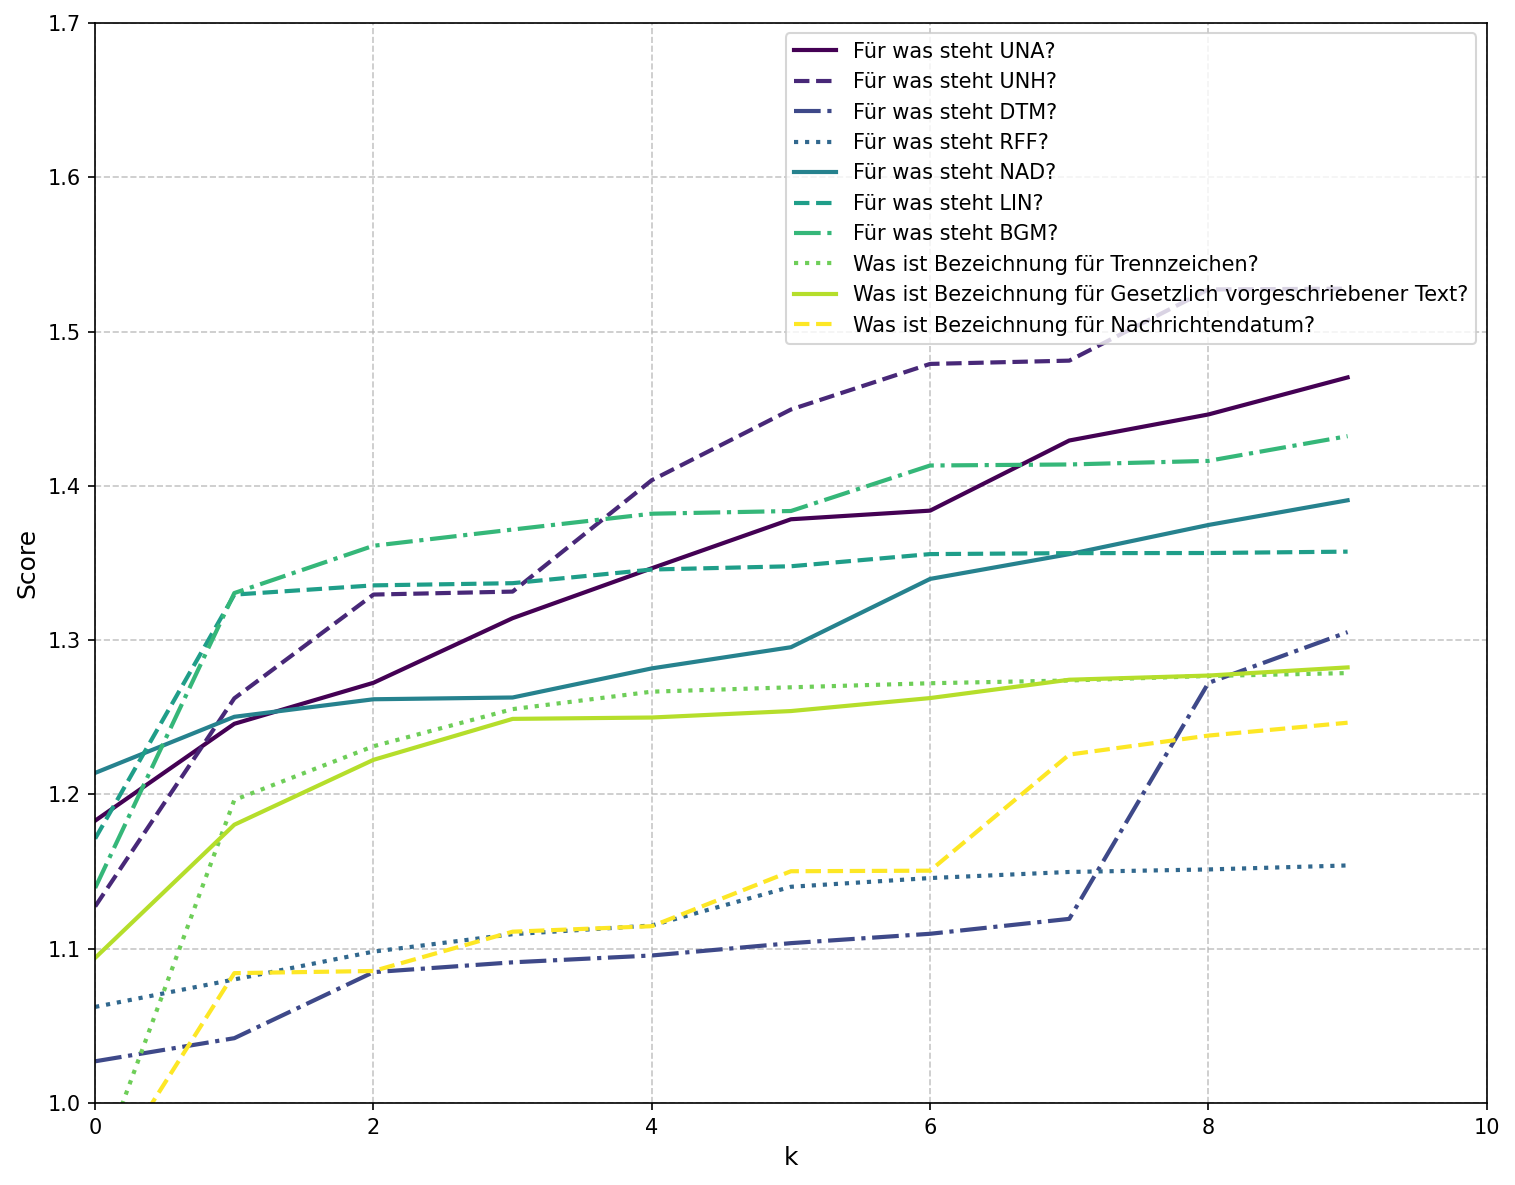

In [4]:
plot_results(
    results,
    test_text_embeddings,
    titel="Hyperparameter k des FAISS-Index auf zehn verschiedenen Fragen untersucht.",
)

Im Folgenden werden die besten Ergebnisse für die Frage „Was bedeutet UNA?” präsentiert. Es zeigt sich, dass für den besten Score die richtigen Informationen ausgewählt wurden, wie aus dem PDF-Auszug ersichtlich ist. Der zweit- und drittbeste Score sind jedoch falsch und alle nachfolgenden auch.

In [5]:
print("1.------------------------------------------------")
print(results_embedding[1][0].page_content)
print("2.------------------------------------------------")
print(results_embedding[1][1].page_content)
print("3.------------------------------------------------")
print(results_embedding[1][3].page_content)

1.------------------------------------------------
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
 Seite:14 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0010 3   UNH   M 1 0  Nachrichten-Kopfsegment  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format  Beispiel  Anwendung / Bemerkung  
UNH       UNH   
0062  Nachrichten-Referenznummer  M an..14   M an..14 +1  Nachrichten-Referenznummer - eindeutige 
Nummer zur Identifikation der Nachricht im 
Datenaustausch, üblicherweise eine fortlaufend 
aufsteigende Nummer beginnend mit 1.  
S009  Nachrichten -Kennung  M   M    
0065  Nachrichtentyp -Kennung  M an..6   M an..6  +INVOIC   INVOIC  Rechnung  
0052  Versionsnummer des  
Nachrichtentyps  M an..3   M an..3 :D   D Entwurfs-Version  
0054  Freigabenummer des  
Nachrichtentyps  M an..3   

Im Folgenden werden die besten Ergebnisse für die Frage „Was bedeutet UNA?” präsentiert. Das Ergebnis zeigt, dass für den besten Score die richtigen Informationen ausgewählt wurden, wie auch bei dem Beispiel davor. Alle anderen Einträge sind ebenfalls falsch.

In [6]:

print("1.------------------------------------------------")
print(results_embedding[0][0].page_content)
print("2.------------------------------------------------")
print(results_embedding[0][1].page_content)
print("3.------------------------------------------------")
print(results_embedding[0][2].page_content)

1.------------------------------------------------
Segmente  
 
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
  Seite:12 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0000 1   UNA   O 1 0  Trennzeichen-Vorgabe  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
UNA       UNA  
UNA1  Gruppendatenelement-  
Trennzeichen  M an1   M an1 : Doppelpunkt  
UNA2  Segment-Bezeichner- und  
Datenelement -Trennzeichen  M an1   M an1 + Pluszeichen  
UNA3  Dezimalzeichen  M an1   M an1  . Punkt  
UNA4  Freigabezeichen  M an1   M an1  ? Fragezeichen  
UNA5  Reserviert für spätere  
Verwendung  M an1   M an1  Leerzeichen  
UNA6  Segment -Endezeichen  M an1   M an1  ' Hochkomma  
 Beispiel  UNA:+.? '
2.------------------------------------------------
Bez = Objekt-B

Die Exploration hat ergeben, dass bei einem einzigen Dokument der k-Wert, der die Anzahl der Ergebnisse repräsentiert, auf 1 gesetzt werden sollte. Bei dieser Art von Dokumenten ist in der Regel nur ein sinnvoller Datenpunkt enthalten, sodass andernfalls falsche Informationen für die Weiterverarbeitung verwendet werden.

In [7]:
for i in range(10):
    print("-----------------------------------------")
    print(f"{i}." + test_text_embeddings[i])
    print("-----------------------------------------")
    print(results_embedding[i][0].page_content)

-----------------------------------------
0.Für was steht UNA?
-----------------------------------------
Segmente  
 
Bez = Objekt-Bezeichner, Nr = Laufende Segmentnumme r im Guide, MaxWdh = Maximale Wiederholung der Segm ente/Gruppen  
St = Status, M=Muss, C=Kann, R=Gefordert, O=Optiona l, D=Abhängig  von , A=Empfohlen, N=Nicht benutzt  
  Seite:12 /96  
 
 Zähler     Nr  Bez   St  MaxWdh  Ebene  Name  
  
 0000 1   UNA   O 1 0  Trennzeichen-Vorgabe  
  
 Standard  Implementierung  
Bez  Name  St  Format   St  Format Beispiel  Anwendung / Bemerkung  
UNA       UNA  
UNA1  Gruppendatenelement-  
Trennzeichen  M an1   M an1 : Doppelpunkt  
UNA2  Segment-Bezeichner- und  
Datenelement -Trennzeichen  M an1   M an1 + Pluszeichen  
UNA3  Dezimalzeichen  M an1   M an1  . Punkt  
UNA4  Freigabezeichen  M an1   M an1  ? Fragezeichen  
UNA5  Reserviert für spätere  
Verwendung  M an1   M an1  Leerzeichen  
UNA6  Segment -Endezeichen  M an1   M an1  ' Hochkomma  
 Beispiel  UNA:+.? '
-----------

Das Ergebnis der Abfrage kann auch unter "notebooks/text_output/embedding_ada.txt" nachgelesen werden.

Hier sind die einzelnen Einordnungen der Fragen:
1.  "Für was steht UNA?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
2.  "Für was steht UNH?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
3.  "Für was steht DTM?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
4.  "Für was steht RFF?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
5.  "Für was steht NAD?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
6.  "Für was steht LIN?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
7.  "Für was steht BGM?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
8.  "Was ist Bezeichnung für Trennzeichen?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
9.  "Was ist Bezeichnung für Gesetzlich vorgeschriebener Text?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig
10. "Was ist Bezeichnung für Nachrichtendatum?":
    Geeignete Antwort für die Weiterverarbeitung. -> Richtig